In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import clear_output
import time

from sklearn.metrics import confusion_matrix

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [2]:
Test = pd.read_csv("Database/Validation.csv")

In [3]:
XTest = np.array(Test[['PhiNorm','ThetaNorm']])
YTest = np.array(Test['Tipo'])

# Creamos la sesión de tensorflow para predecir

INFO:tensorflow:Restoring parameters from Modelo1.ckpt


2023-06-24 17:05:56.407225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-24 17:05:56.410448: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


[0.98557717]


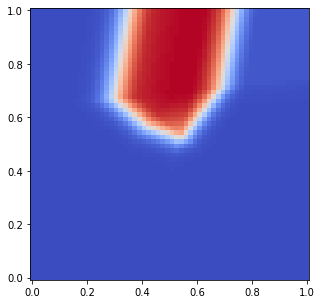

In [4]:
saver = tf.train.import_meta_graph('Modelo1.ckpt.meta')

with tf.Session() as sess:
    
    saver.restore(sess,'Modelo1.ckpt')  
    
    X = sess.graph.get_tensor_by_name('input1:0')
    lout = sess.graph.get_tensor_by_name('strided_slice:0')
    
    Yp = sess.run(lout, feed_dict={X:[[0.5,0.8]]})
    print(Yp)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
        
    N = 60
        
    x = np.linspace(0.,1.,N)
    y = np.linspace(0.,1.,N) 

    Y = np.zeros((N,N))

    for i, _x in enumerate(x):
        for j, _y in enumerate(y):
            Y[i,j] = sess.run(lout,feed_dict={X:[[_x,_y]]})
        
    ax.pcolormesh(x,y,Y.T,cmap='coolwarm')
    
    YPrediction = np.round(sess.run(lout,feed_dict={X:XTest}),0)

In [5]:
YPrediction

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
_YPred = tf.constant(YPrediction, dtype=tf.int32)
_YTest = tf.constant(YTest, dtype=tf.int32)

In [15]:
with tf.Session() as sess:
    Confusion = tf.math.confusion_matrix(_YTest,_YPred, num_classes=2)
    ConfusionMatrix = Confusion.eval(session=sess)
    print(Confusion.eval(session=sess))

[[240  10]
 [  3  47]]


In [16]:
ConfusionMatrix

array([[240,  10],
       [  3,  47]], dtype=int32)

In [20]:
ConfusionMatrix2 = confusion_matrix(YTest,YPrediction)
ConfusionMatrix2

array([[240,  10],
       [  3,  47]])